# Advanced pandas - Going Beyond the Basics

## pandasAI
___

### Table of Contents
1. [Import dependencies](#section1)
2. [Import dataset](#section2)
3. [Instantiate OpenAI LLM and pandasAI object](#section3)
4. [Running queries](#section4)
5. [Enforcing privacy](#section5)
6. [Common data manipulations](#section6)

___
<a id='section1'></a>
## (1) Import dependencies

In [1]:
# Install dependencies (if not already done so)
# !pip install pandas==2.0.3
# !pip install pandasai==0.4.0

In [2]:
import numpy as np
import pandas as pd
import pandasai as pdai
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

___
<a id='section2'></a>
## (2) Import dataset
- Data Source: https://www.kaggle.com/datasets/datascientistanna/customers-dataset (Database Contents License (DbCL) v1.0)

In [3]:
# Import and read CSV file
df = pd.read_csv('https://raw.githubusercontent.com/kennethleungty/Educative-Advanced-Pandas/main/data/csv/Customers_Mini.csv')

# Set CustomerID as index
df = df.set_index('CustomerID')

# View entire DataFrame
df

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


___
<a id='section3'></a>
## (3) Instantiate OpenAI LLM and pandasAI object
We need to first set up the OpenAI API connection to our desired large language model (LLM), and then instantiate a `pandasAI` object for which we will pass our DataFrame and query into.

> **Note**: For this lesson, we will make use of OpenAI GPT3.5 (aka 
gpt-3.5-turbo). The list of supported Chat models includes "gpt-4", "gpt-4-0314", "gpt-4-32k", "gpt-4-32k-0314","gpt-3.5-turbo", "gpt-3.5-turbo-0301".

> Check out this link to find out how to retrieve your OpenAI API key: https://help.openai.com/en/articles/4936850-where-do-i-find-my-secret-api-key

In [4]:
# Setup OpenAI LLM
OPENAI_API_KEY = '' # insert your API Key here
llm = OpenAI(api_token=OPENAI_API_KEY) # Default is GPT3.5

In [5]:
# Instantiate PandasAI object from LLM
pandas_ai = PandasAI(llm)

___
<a id='section4'></a>
## (4) Running queries
We now put `pandasAI` to the test by passing text queries to obtain the output required. Besides text and DataFrame output, `pandasAI` can also be used to generate charts and visualizations.

In [6]:
# Ask generic queries
pandas_ai.run(df, prompt='Which is the most common profession?')

'Engineer'

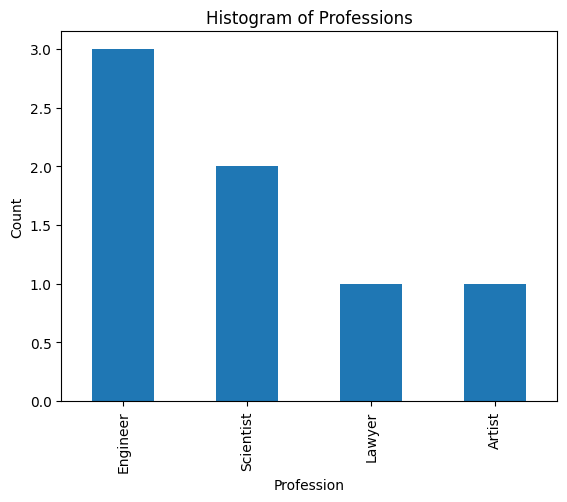

In [7]:
pandas_ai.run(df, prompt='Give me a histogram of the count of professions')

In [8]:
pandas_ai.run(df, prompt='What is the gender ratio of males to females')

Gender
Female    0.714286
Male      0.285714
Name: proportion, dtype: float64

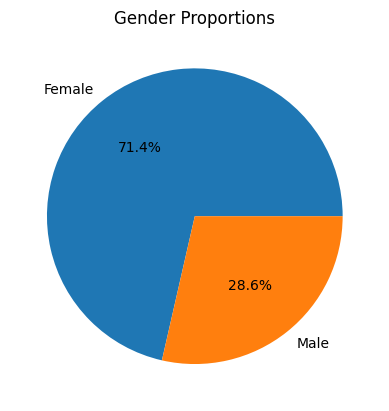

In [9]:
pandas_ai.run(df, prompt='Give me a pie chart to show the gender proportions')

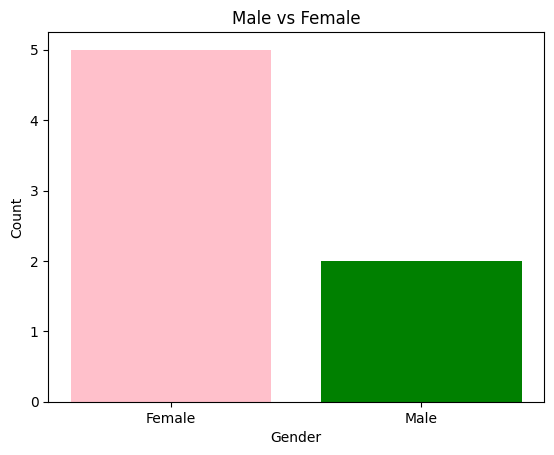

In [10]:
pandas_ai.run(df, prompt='Give me plot of male versus female in green vs pink colors')

In [11]:
pandas_ai.run(df, prompt='Give me a DataFrame filtered to only scientist profession')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
7,Female,35,31000,6,Scientist,1,3


The examples above show how easy it is for us to use language to generate a variety of analysis output we may need. 

We can even get `pandasAI` to give us the raw `pandas` code used to generate the output, as shown in the example below where we leverage the `show_code` and `is_conversational_answer` parameters:

In [12]:
# Get pandasAI to show us the raw code in a conversational manner
pandas_ai.run(df, 
              prompt='Give me the pandas code to generate a DataFrame filtered to only the scientist profession',
              show_code=True, # Creates a new Jupyter notebook cell with the code
              is_conversational_answer=True)

"To generate a DataFrame filtered to only the scientist profession, you can use the following pandas code:\n\n```python\nscientist_df = df[df['Profession'] == 'Scientist']\n```\n\nThis code will create a new DataFrame called `scientist_df` that only includes rows where the 'Profession' column is equal to 'Scientist'."

In [ ]:
scientist_df = df[df['Profession'] == 'Scientist']
print(scientist_df)

In [13]:
scientist_df = df[df['Profession'] == 'Scientist']
print(scientist_df)

            Gender  Age  AnnualIncome  SpendingScore Profession  \
CustomerID                                                        
1             Male   19         15000             39  Scientist   
7           Female   35         31000              6  Scientist   

            WorkExperience  FamilySize  
CustomerID                              
1                        1           4  
7                        1           3  


If we want to return the code directly without a conversational reply, we can set `is_conversational_answer=False`, as seen below:

In [14]:
# Get pandasAI to show us the raw code
pandas_ai.run(df, 
              prompt='Give me the pandas code to generate a DataFrame filtered to only the scientist profession',
              show_code=True,
              is_conversational_answer=False)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
7,Female,35,31000,6,Scientist,1,3


In [ ]:
scientist_df = df[df['Profession'] == 'Scientist']
print(scientist_df)

In [15]:
scientist_df = df[df['Profession'] == 'Scientist']
print(scientist_df)

            Gender  Age  AnnualIncome  SpendingScore Profession  \
CustomerID                                                        
1             Male   19         15000             39  Scientist   
7           Female   35         31000              6  Scientist   

            WorkExperience  FamilySize  
CustomerID                              
1                        1           4  
7                        1           3  


In [16]:
# This code cell is automatically generated after running the previous cell
scientist_df = df[df['Profession'] == 'Scientist']
print(scientist_df)

            Gender  Age  AnnualIncome  SpendingScore Profession  \
CustomerID                                                        
1             Male   19         15000             39  Scientist   
7           Female   35         31000              6  Scientist   

            WorkExperience  FamilySize  
CustomerID                              
1                        1           4  
7                        1           3  


___
<a id='section5'></a>
## (5) Enforcing privacy

By default, `pandasAI` introduces privacy measures by not ingesting the entire DataFrame passed into it. Instead, what it does is that it takes the DataFrame head, randomizes the data within (using random generation for sensitive data and shuffling for non-sensitive data), and then passing the first five randomized rows (i.e., DataFrame head) into the LLM.

The following code and output illustrates these points, where only the first 5 rows of the DataFrame is used, and even then, these 5 rows have their data shuffled and randomized such that they do not resemble the actual raw data.

In [17]:
pdai.helpers.anonymizer.anonymize_dataframe_head(df, force_conversion=True)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Female,23,59000,6,Engineer,0,6
2,Male,20,15000,77,Artist,0,1
3,Female,23,38000,40,Scientist,2,6
4,Male,31,59000,40,Engineer,3,4
5,Female,21,38000,81,Lawyer,1,2


If wish to further enforce the privacy aspect, we can utilize the `enforce_privacy` parameter in the `pandasAI` object and the `anonymize_df` parameter in the `run()` method. These will change the settings such that we only send the column names to the LLM, without sending any data rows through.

In [18]:
# Reinstantiate pandasAI object
pandas_ai = PandasAI(llm, 
                     verbose=True, 
#                      conversational=False, 
                     enforce_privacy=True)

In [19]:
pandas_ai.run(df, 
              prompt='What is the average age of the customers?',
              anonymize_df=True,
              show_code=False)

Running PandasAI with openai LLM...
Using cached response

Code running:
```
average_age = df['Age'].mean()
average_age
```
Answer: 24.428571428571427


24.428571428571427

The printout above shows that the LLM only gets to access and interpret the column headers, and then generates a `pandas` code that best answers our query.

___
<a id='section6'></a>
## (6) Common data manipulations

Now that we have a general grasp of `pandasAI`, let us see go through several examples involving numerous common data manipulations that we may perform:

In [20]:
# Reinstantiate pandasAI object to reset it to default privacy settings
pandas_ai = PandasAI(llm)

### Summary of DataFrame

In [21]:
prompt = 'describe the information of the dataframe'

pandas_ai.run(df, 
              prompt=prompt, 
              show_code=False,
              is_conversational_answer=False)

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          7 non-null      object
 1   Age             7 non-null      int64 
 2   AnnualIncome    7 non-null      int64 
 3   SpendingScore   7 non-null      int64 
 4   Profession      7 non-null      object
 5   WorkExperience  7 non-null      int64 
 6   FamilySize      7 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 448.0+ bytes


### Data selection/filtering

In [22]:
prompt = 'give me a dataframe of female customers with annual income above 40000'

pandas_ai.run(df, 
              prompt=prompt, 
              show_code=False,
              is_conversational_answer=False)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
6,Female,22,58000,76,Engineer,0,2


### Sorting

In [23]:
prompt = 'return the dataframe sorted by annual income in descending order'

pandas_ai.run(df, 
              prompt=prompt, 
              show_code=False,
              is_conversational_answer=False)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
6,Female,22,58000,76,Engineer,0,2
5,Female,31,38000,40,Artist,2,6
2,Male,21,35000,81,Engineer,3,3
7,Female,35,31000,6,Scientist,1,3
1,Male,19,15000,39,Scientist,1,4


### Groupby and aggregation

In [24]:
prompt = 'group by gender and give me the average age'

pandas_ai.run(df, 
              prompt=prompt, 
              show_code=False,
              is_conversational_answer=False)

Gender
Female    26.2
Male      20.0
Name: Age, dtype: float64

### Reshaping

In [25]:
prompt = 'generate pivot table of gender and profession, with the values being average annual income'

pandas_ai.run(df, 
              prompt=prompt, 
              show_code=False,
              is_conversational_answer=False)

Profession,Artist,Engineer,Lawyer,Scientist
Gender,,,,
Female,38000.0,72000.0,59000.0,31000.0
Male,NaN,35000.0,NaN,15000.0


### Data Cleaning

In [26]:
# Introduce 10 random NaN values into our DataFrame
n = 10 
df_with_nan = df.copy()

# Create a list of random row indices
row_indices = np.random.randint(low=0, high=df.shape[0], size=n)

# Create a list of random column indices
col_indices = np.random.randint(low=0, high=df.shape[1], size=n)

# Use the indices to replace elements with NaN
for i in range(n):
    df_with_nan.iat[row_indices[i], col_indices[i]] = np.nan
    
# View df with NaN values
df_with_nan

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19.0,NaN,39,Scientist,1,NaN
2,Male,NaN,35000.0,81,Engineer,3,3.0
3,Female,20.0,NaN,6,Engineer,1,1.0
4,Female,NaN,59000.0,77,NaN,0,2.0
5,NaN,31.0,38000.0,40,NaN,2,6.0
6,Female,22.0,58000.0,76,Engineer,0,2.0
7,NaN,35.0,31000.0,6,Scientist,1,3.0


In [27]:
prompt = 'Return dataframe where NaN values are filled with the string "Missing"',

pandas_ai.run(df_with_nan, 
              prompt=prompt,
              show_code=False,
              is_conversational_answer=False)

"Unfortunately, I was not able to answer your question, because of the following error:\n\n'tuple' object has no attribute 'encode'\n"

### Merging

In [28]:
# Generate a second DataFrame (postal codes) for merging
data = [[1, 532342],
        [2, 342668],
        [3, 434758],
        [4, 948674],
        [5, 520250],
        [6, 778385],
        [7, 448873]]

df_postal = pd.DataFrame(data, columns=['CustomerID', 'PostalCode'])
df_postal.set_index('CustomerID', inplace=True)

In [29]:
prompt = 'Merge these two dataframes based on the index CustomerID'

pandas_ai.run([df, df_postal], 
              prompt=prompt, 
              show_code=False,
              is_conversational_answer=False)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize,PostalCode
CustomerID,,,,,,,,
1,Male,19,15000,39,Scientist,1,4,532342
2,Male,21,35000,81,Engineer,3,3,342668
3,Female,20,86000,6,Engineer,1,1,434758
4,Female,23,59000,77,Lawyer,0,2,948674
5,Female,31,38000,40,Artist,2,6,520250


### Arithmetic operations

In [30]:
prompt = 'return me a dataframe where the annual income is divided by 100'

pandas_ai.run(df,
              prompt=prompt, 
              show_code=False,
              is_conversational_answer=False)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,150.0,39,Scientist,1,4
2,Male,21,350.0,81,Engineer,3,3
3,Female,20,860.0,6,Engineer,1,1
4,Female,23,590.0,77,Lawyer,0,2
5,Female,31,380.0,40,Artist,2,6
6,Female,22,580.0,76,Engineer,0,2
7,Female,35,310.0,6,Scientist,1,3


These examples showcase the versatility of using LLMs (via `pandasAI`) to simplify our use of `pandas`. The prompts used need to be carefully designed as not all text can be interpreted accurately by the LLMs. To improve the interpretation accuracy, we can leverage more powerful LLMs like OpenAI's GPT4 model.